# Practice: Conecepto generales de redes neuronales

El dataset a utilizar es CIFAR10, que es un conjunto de imagenes de objetos cotidianos en 10 clases diferentes (Aviones, Automóviles, Pájaros, Gtaos, Ciervos, Perros, Ranas, Caballos, Barcos, Camiones) de 32 x 32 píxeles en color (RGB) disponible en Keras.

Primero importaremos la libreria de tensorflow

In [1]:
import tensorflow as tf
print(tf.__version__)

2024-06-22 13:22:07.235848: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


2.16.1


Importamos el dataset CIFAR10 (que es uno de los dataset de entrenamiento que esta guardado en keras)

In [2]:
mnist = tf.keras.datasets.cifar10

Llamar a **load_data** en este dataset nos dara dos conjuntos de listas, estos serán los valores de entrenamiento y prueba que contiene los objetos y sus etiquetas

In [3]:
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 126s 1us/step


Mostremos las imagenes de entrenamiento y su clase correspondiente

/var/folders/2h/5rpkv6yn49jd6q4th6r8p8km0000gr/T/ipykernel_34915/1993875425.py:23: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  label_index = int(training_labels[index])


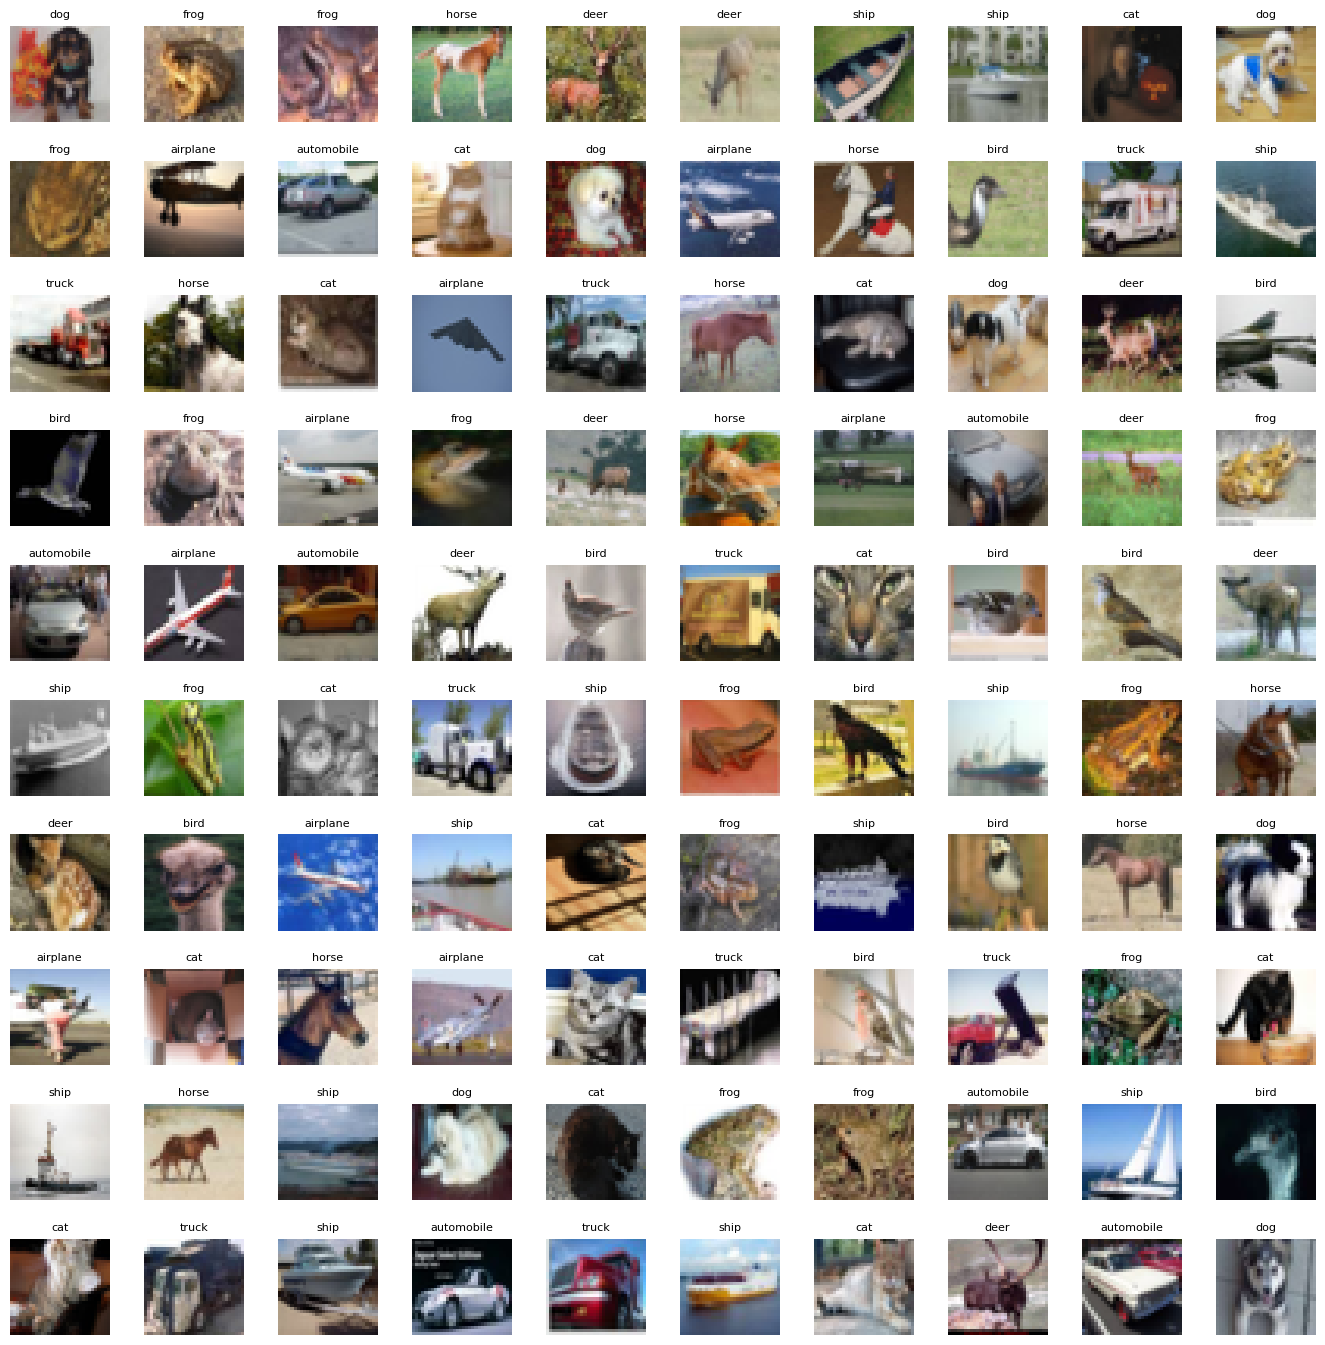

In [43]:
import numpy as np
import matplotlib.pyplot as plt

# Define the labels of the dataset
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Define the dimensions of the plot grid 
W_grid = 10
L_grid = 10

# Create a figure and axes objects for the plot
fig, axes = plt.subplots(L_grid, W_grid, figsize=(17, 17))
axes = axes.ravel()  # Flatten the grid matrix into a 1D array

n_train = len(training_images)  # Get the length of the train dataset

# Select a random number from 0 to n_train
for i, ax in enumerate(axes):
    # Select a random index
    index = np.random.randint(0, n_train)
    # Read and display an image with the selected index  
    ax.imshow(training_images[index, 1:])
    label_index = int(training_labels[index])
    ax.set_title(labels[label_index], fontsize=8)
    ax.axis('off')

plt.subplots_adjust(hspace=0.4)

Mostremos la primer imagen del entrenamiento y su clase.

[6]
frog
[[[0.23137255 0.24313725 0.24705882]
  [0.16862745 0.18039216 0.17647059]
  [0.19607843 0.18823529 0.16862745]
  ...
  [0.61960784 0.51764706 0.42352941]
  [0.59607843 0.49019608 0.4       ]
  [0.58039216 0.48627451 0.40392157]]

 [[0.0627451  0.07843137 0.07843137]
  [0.         0.         0.        ]
  [0.07058824 0.03137255 0.        ]
  ...
  [0.48235294 0.34509804 0.21568627]
  [0.46666667 0.3254902  0.19607843]
  [0.47843137 0.34117647 0.22352941]]

 [[0.09803922 0.09411765 0.08235294]
  [0.0627451  0.02745098 0.        ]
  [0.19215686 0.10588235 0.03137255]
  ...
  [0.4627451  0.32941176 0.19607843]
  [0.47058824 0.32941176 0.19607843]
  [0.42745098 0.28627451 0.16470588]]

 ...

 [[0.81568627 0.66666667 0.37647059]
  [0.78823529 0.6        0.13333333]
  [0.77647059 0.63137255 0.10196078]
  ...
  [0.62745098 0.52156863 0.2745098 ]
  [0.21960784 0.12156863 0.02745098]
  [0.20784314 0.13333333 0.07843137]]

 [[0.70588235 0.54509804 0.37647059]
  [0.67843137 0.48235294 0.1

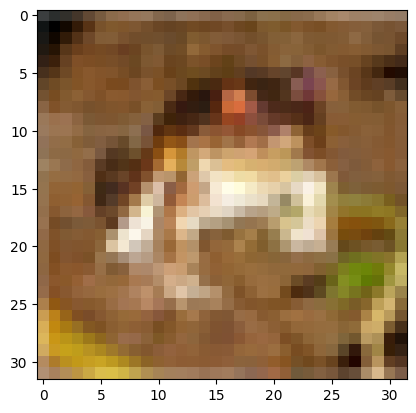

In [44]:


np.set_printoptions(linewidth=200)
plt.imshow(training_images[0], cmap='gray')

# Obtener la etiqueta en forma de palabra
label = labels[training_labels[0].item()]

print(training_labels[0])
print(label)
print(training_images[0])

Todos los valores númericos están entre 0 y 255, al entrenar una red neuronal, una buena practica es tranformar tdos los valores entre 0 y 1, este es el siguiente proceso y  se llama "normalización"

In [9]:
training_images = training_images / 255.0
test_images = test_images / 255.0

Antes de continuar define los siguientes conceptos de una red neuronal:

**Sequential:**

**Dense:**

**Flatten:**

**Relu:**

**Softmax:**

Utilizando keras define y entrena una red neuronal que sea capaz de clasificar las imagenes de CIFAR10 con las siguientes características:

una capa oculta de tamaño 128, utilizando un optimizador Adam.
durante el entrenamiento la red tiene que mostar resultados de loss y accuracy por cada epoch
La red debe entrenar durante 20 epochs y batch size de 64.
La ultima capa debe ser una capa de softmax.
Tu red tendría que ser capaz de superar 80% de accurarcy en entrenamiento

In [29]:
# Definir modelo
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])


In [30]:
#Compilar modelo

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [31]:
#Entrenar modelo

history = model.fit(training_images, training_labels, epochs=20, batch_size=64,
                    validation_data=(test_images, test_labels))

Epoch 1/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 27s 33ms/step - accuracy: 0.3689 - loss: 1.7655 - val_accuracy: 0.5266 - val_loss: 1.3163
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 26s 33ms/step - accuracy: 0.5640 - loss: 1.2469 - val_accuracy: 0.5908 - val_loss: 1.1681
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 27s 34ms/step - accuracy: 0.6163 - loss: 1.1085 - val_accuracy: 0.6140 - val_loss: 1.1138
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 26s 33ms/step - accuracy: 0.6453 - loss: 1.0257 - val_accuracy: 0.6156 - val_loss: 1.1151
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 27s 34ms/step - accuracy: 0.6640 - loss: 0.9655 - val_accuracy: 0.6255 - val_loss: 1.0849
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 27s 34ms/step - accuracy: 0.6823 - loss: 0.9167 - val_accuracy: 0.6358 - val_loss: 1.0586
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 34ms/step - accuracy: 0.6945 - loss: 0.8729 - val_accuracy: 0.6352 - val_loss: 1.0666
Epoch 8/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 28s 36ms/step - accuracy: 0.7148 - loss: 0.8185 - 

Evalua el modelo con las imagenes y etquetas de test

In [45]:
model.evaluate(test_images, test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6429 - loss: 1.2409


[1.2708460092544556, 0.6383000016212463]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


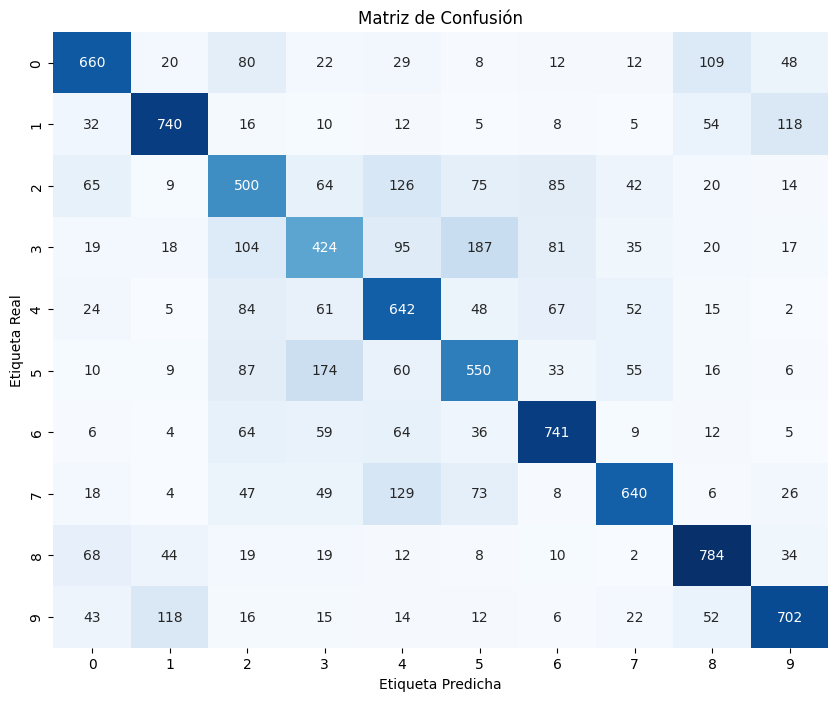

In [46]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Obtén las predicciones del modelo
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

# Crea la matriz de confusión
cm = confusion_matrix(test_labels, predicted_labels)

# Visualiza la matriz de confusión
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matriz de Confusión')
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Real')
plt.show()

In [48]:
model_1024 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model_1024.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model_1024.fit(training_images, training_labels, epochs=20, batch_size=64,
                    validation_data=(test_images, test_labels))

/usr/local/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 100s 126ms/step - accuracy: 0.3920 - loss: 1.7555 - val_accuracy: 0.5569 - val_loss: 1.2333
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 96s 123ms/step - accuracy: 0.6015 - loss: 1.1275 - val_accuracy: 0.6178 - val_loss: 1.1017
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 97s 124ms/step - accuracy: 0.6625 - loss: 0.9620 - val_accuracy: 0.6516 - val_loss: 1.0036
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 96s 123ms/step - accuracy: 0.7195 - loss: 0.8045 - val_accuracy: 0.6649 - val_loss: 0.9976
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 100s 128ms/step - accuracy: 0.7687 - loss: 0.6679 - val_accuracy: 0.6678 - val_loss: 0.9857
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 98s 126ms/step - accuracy: 0.8194 - loss: 0.5287 - val_accuracy: 0.6647 - val_loss: 1.0215
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 145s 130ms/step - accuracy: 0.8666 - loss: 0.4095 - val_accuracy: 0.6695 - val_loss: 1.0727
Epoch 8/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 100s 128ms/step - accuracy: 0.9044 - los

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


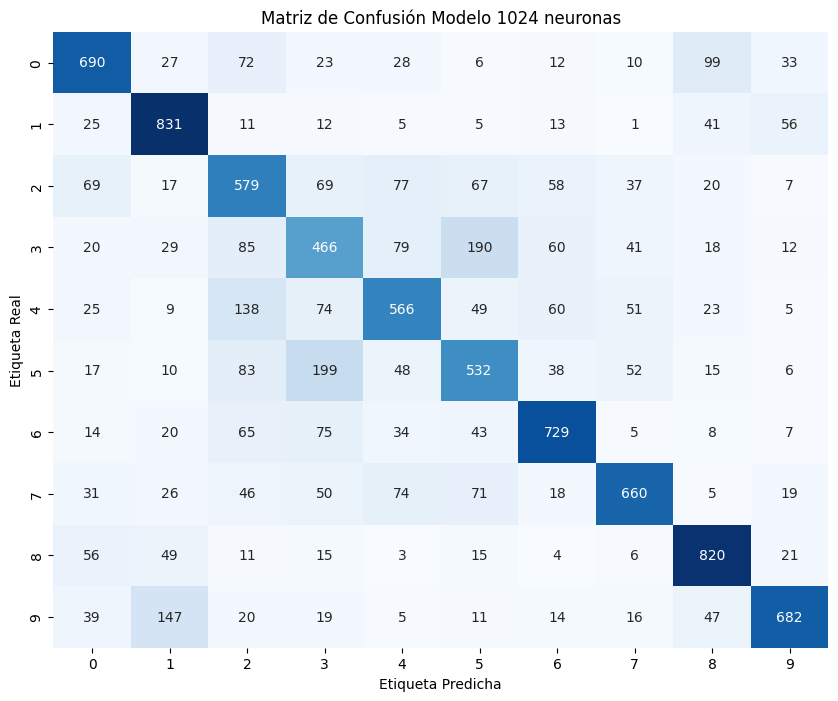

In [51]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Obtén las predicciones del modelo
predictions = model_1024.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

# Crea la matriz de confusión
cm = confusion_matrix(test_labels, predicted_labels)

# Visualiza la matriz de confusión
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matriz de Confusión Modelo 1024 neuronas')
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Real')
plt.show()

In [53]:
model_512 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model_512.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model_512.fit(training_images, training_labels, epochs=20, batch_size=64,
                    validation_data=(test_images, test_labels))

/usr/local/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 47s 56ms/step - accuracy: 0.4049 - loss: 1.6783 - val_accuracy: 0.5723 - val_loss: 1.2128
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 52ms/step - accuracy: 0.5935 - loss: 1.1524 - val_accuracy: 0.5895 - val_loss: 1.1554
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 53ms/step - accuracy: 0.6524 - loss: 0.9916 - val_accuracy: 0.6268 - val_loss: 1.0624
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 52ms/step - accuracy: 0.6959 - loss: 0.8681 - val_accuracy: 0.6227 - val_loss: 1.0922
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 46s 59ms/step - accuracy: 0.7325 - loss: 0.7602 - val_accuracy: 0.6510 - val_loss: 1.0169
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 42s 53ms/step - accuracy: 0.7731 - loss: 0.6500 - val_accuracy: 0.6556 - val_loss: 1.0210
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 46s 59ms/step - accuracy: 0.8100 - loss: 0.5483 - val_accuracy: 0.6572 - val_loss: 1.0444
Epoch 8/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 40s 51ms/step - accuracy: 0.8436 - loss: 0.4584 - 

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


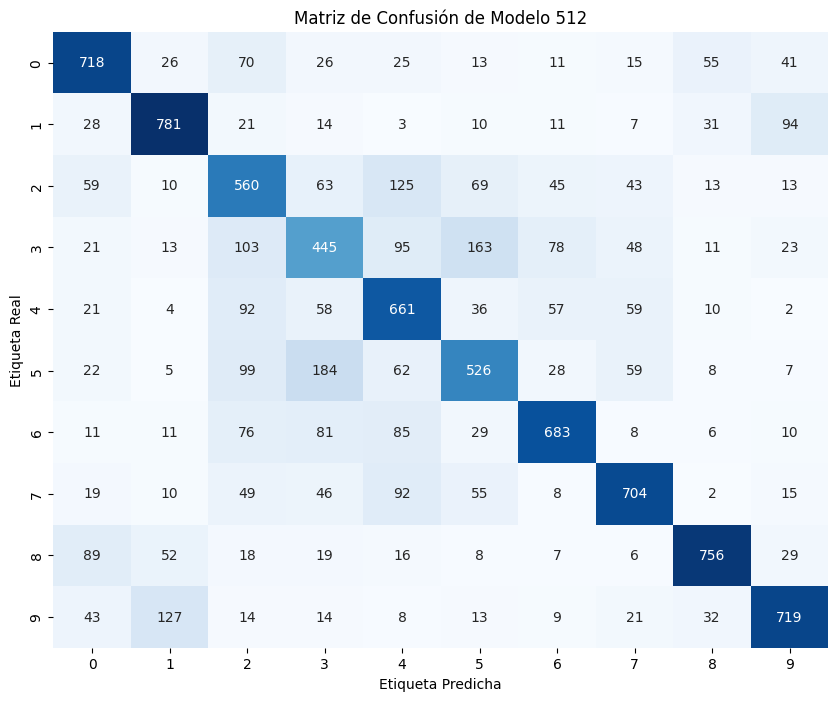

In [52]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Obtén las predicciones del modelo
predictions = model_512.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

# Crea la matriz de confusión
cm = confusion_matrix(test_labels, predicted_labels)

# Visualiza la matriz de confusión
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matriz de Confusión de Modelo 512')
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Real')
plt.show()